In [6]:
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;} </style>"))

%load_ext autoreload
%autoreload 2

In [98]:
import os
import re
import pandas as pd
import numpy as np
import shlex
from io import StringIO

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [8]:
from pyelegant.ElegantRun import ElegantRun
from pyelegant.SDDSTools.SDDS import SDDS, SDDSCommand
from pyelegant.SDDSTools.Utils import GenerateNDimCoordinateGrid

In [9]:
sif = "/home/mti/gitlab-hzb/containers/bin/pelegant.sif"
lattice = "/home/mti/tmp/sdds/fodo.lte"

In [88]:
with open(lattice, "r") as f:
    lat = f.read()

In [66]:
elements ={
    "QF":{
        "type" : "KQUAD",
        "L": 0.342,
        "K1": 0.49,
        "N_KICKS":16
    },
    "QD":{
        "type" : "KQUAD",
        "L": 0.668,
        "K1": -0.4999,
        "N_KICKS":16
    },
    "D":{
        "type" : "DRIF",
     "L":3.5805   
    },
    "W1": {
        "type": "WATCH",
        "filename":"\"%s-%03ld.w1\"",
        "mode": "coordinates"
    }
}

FODOstr = "! FODO cell used by Jernej Frank for studying TRIBs\n\n"
stringlist = ["{:6}: {}".format(k,", ".join(["{}={:15.12f}".format(kk,vv) 
                                             if not isinstance(vv,str)
                                             else "{}={}".format(kk,vv)
                                             if kk!="type" else "{}".format(vv) for kk,vv in v.items()])) 
              for k,v in elements.items()]
line = ["W1","QF","D","QD","D","QF"]
linestr = "{:6}: LINE=({})".format("FODO",",".join(line))
FODOstr += "\n".join(stringlist)
FODOstr += "\n\n"
FODOstr += linestr

In [67]:
print(FODOstr)

! FODO cell used by Jernej Frank for studying TRIBs

QF    : KQUAD, L= 0.342000000000, K1= 0.490000000000, N_KICKS=16.000000000000
QD    : KQUAD, L= 0.668000000000, K1=-0.499900000000, N_KICKS=16.000000000000
D     : DRIF, L= 3.580500000000
W1    : WATCH, filename="%s-%03ld.w1", mode=coordinates

FODO  : LINE=(W1,QF,D,QD,D,QF)


In [226]:
print(lat)

%  0.54102 sto kqf
%  0.637 sto kqf
% -0.27051 sto kqd
% 16 sto nk

DL: DRIF, L=1.5

QF1: KQUAD, L=0.5, K1="kqf", TILT=0.0, DX=0.05, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
QD1: KQUAD, L=2.5, K1="kqd", TILT=0.0, DX=0.0, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
QF2: KQUAD, L=0.5, K1="kqf", TILT=0.0, DX=0.0, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
!QF2: KQUAD, L=0.5, K1=0.58102, TILT=0.0, DX=0.05, DY=0.0, N_KICKS=16, SYNCH_RAD=0, ISR=0, ISR1PART=0

W1 : WATCH, filename="%s-%03ld.w1", mode=coordinates
W2 : WATCH, filename="%s-%03ld.w2", mode=coordinates
ACC: LINE=(W1, QF1, W2,DL, QD1, DL, QF2)


!QF1: KQUAD, L=0.5, K1="kqf", TILT=0.0, DX=0.0, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
!QD1: KQUAD, L=2.5, K1="kqd", TILT=0.0, DX=0.0, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
!QF2: KQUAD, L=0.5, K1="kqf", TILT=0.0, DX=0.0, DY=0.0, N_KICKS="nk", SYNCH_RAD=0, ISR=0, ISR1PART=0
!HCM : HKICK, L=0.0, KICK=0.05

!W1 : WATCH, filename="%s-%

In [68]:
with open("FODO_Jernej.lte","w") as f:
    f.write(FODOstr)

In [77]:
lattice = "FODO_Jernej.lte"

In [69]:
elements ={
    "QF":{
        "type" : "QUAD",
        "L": 0.342,
        "K1": 0.49,
#         "N_KICKS":16
    },
    "QD":{
        "type" : "QUAD",
        "L": 0.668,
        "K1": -0.4999,
#         "N_KICKS":16
    },
    "D":{
        "type" : "DRIF",
     "L":3.5805   
    },
    "W1": {
        "type": "WATCH",
        "filename":"\"%s-%03ld.w1\"",
        "mode": "coordinates"
    }
}

FODOstr = "! FODO cell used by Jernej Frank for studying TRIBs\n\n"
stringlist = ["{:6}: {}".format(k,", ".join(["{}={:15.12f}".format(kk,vv) 
                                             if not isinstance(vv,str)
                                             else "{}={}".format(kk,vv)
                                             if kk!="type" else "{}".format(vv) for kk,vv in v.items()])) 
              for k,v in elements.items()]
line = ["W1","QF","D","QD","D","QF"]
linestr = "{:6}: LINE=({})".format("FODO",",".join(line))
FODOstr += "\n".join(stringlist)
FODOstr += "\n\n"
FODOstr += linestr

In [70]:
with open("FODO_Jernej_non_symplectic.lte","w") as f:
    f.write(FODOstr)

In [71]:
lattice = "FODO_Jernej_non_symplectic.lte"

In [78]:
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)

In [58]:
twidata, twipar = er.findtwiss()

In [39]:
twipar.index

Index(['Step', 'nux', 'dnux/dp', 'dnux/dp2', 'dnux/dp3', 'Ax', 'AxLocation',
       'nuy', 'dnuy/dp', 'dnuy/dp2', 'dnuy/dp3', 'Ay', 'AyLocation',
       'deltaHalfRange', 'nuxChromUpper', 'nuxChromLower', 'nuyChromUpper',
       'nuyChromLower', 'pCentral', 'dbetax/dp', 'dbetay/dp', 'dalphax/dp',
       'dalphay/dp', 'etax2', 'etay2', 'etax3', 'etay3', 'etaxp2', 'etayp2',
       'etaxp3', 'etayp3', 'betaxMin', 'betaxAve', 'betaxMax', 'betayMin',
       'betayAve', 'betayMax', 'etaxMax', 'etayMax', 'waistsx', 'waistsy',
       'dnux/dAx', 'dnux/dAy', 'dnuy/dAx', 'dnuy/dAy', 'dnux/dAx2',
       'dnux/dAy2', 'dnux/dAxAy', 'dnuy/dAx2', 'dnuy/dAy2', 'dnuy/dAxAy',
       'nuxTswaLower', 'nuxTswaUpper', 'nuyTswaLower', 'nuyTswaUpper',
       'couplingIntegral', 'couplingDelta', 'emittanceRatio', 'alphac2',
       'alphac', 'I1', 'I2', 'I3', 'I4', 'I5', 'ex0', 'enx0', 'taux', 'Jx',
       'tauy', 'Jy', 'Sdelta0', 'taudelta', 'Jdelta', 'U0', 'length'],
      dtype='object', name='ParameterName'

In [40]:
twipar.pCentral, twipar.I2

(3326.816, 0.0)

In [112]:
tup = er.find_matrices(SDDS_output_order=4)

In [41]:
delta = 1.5e-3 * twipar.pCentral
delta

4.9902239999999995

In [42]:
twipar.pCentral + delta 

3331.806224

In [269]:
man_ranges= {
    0 : np.linspace(1.7,2.0,100),#np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,1.975,1.9875,2,2.1,2.2,2.3]),
    1 : [0.05], #0.05
    2 : 0,#[.001,0.01,0.1,1,1.95,2],
    3 : 0,
    4 : 0,
    5 : twipar.pCentral + delta 
}

er.generate_sdds_particle_inputfile(man_ranges=man_ranges)

Shape: (100, 6) - Number of paritcles: 100 
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount


In [ ]:
man_ranges= {
    0 : np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,1.975,1.9875,2,2.1,2.2,2.3]),
    1 : [0.05], #0.05
    2 : 0,#[.001,0.01,0.1,1,1.95,2],
    3 : 0,
    4 : 0,
    5 : twipar.pCentral + delta 
}

er.generate_sdds_particle_inputfile(man_ranges=man_ranges)

In [318]:
er.track_simple(n_passes=20000)

bash run_pelegant.sh
bash run_pelegant.sh temp.ele


In [319]:
sddsp = SDDS(sif,"temp-001.w1",0)

In [320]:
pdata = sddsp.readParticleData()

False
temp-001.w1
temp-001.w1
['x', 'xp', 'y', 'yp', 't', 'p', 'dt', 'particleID']
Warning - auto filename set
Changed from temp-001.w1 to temp-001.w1.txt
Warning - auto filetype set
Changed from 0 to 1
File is large, output redirected to file temp-001.w1.txt_columnvalues.dat


In [305]:
sddsp.sddsplot_base(
    columnNames="x,xp",
    file="temp-001.w1",
    scale="0,0,0,0",
    graph="symb,vary=subtype,fill",
    order="spectral",
    split="columnBin=particleID",
#     device="gif",
#     output="FODO_island_init_px_non_zero_non_symplectic.gif"
)


Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=x,xp temp-001.w1 -scale=0,0,0,0 -graph=symb,vary=subtype,fill -order=spectral -split=columnBin=particleID


In [112]:
sddsp.sddsplot_base(
    columnNames="y,yp",
    file="temp-001.w1",
    scale="0,0,0,0",
    graph="symb,vary=subtype,fill",
    order="spectral",
    split="columnBin=particleID",
#     device="gif",
#     output="FODO_island_init_px_zero.gif"
)


Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=y,yp temp-001.w1 -scale=0,0,0,0 -graph=symb,vary=subtype,fill -order=spectral -split=columnBin=particleID


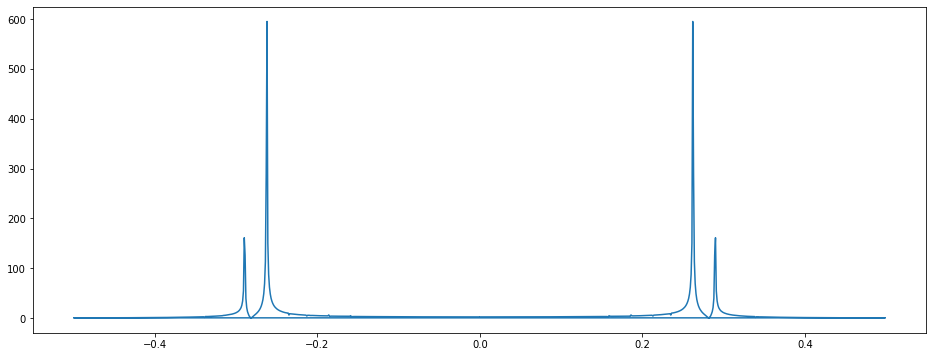

In [139]:
data = pdata.groupby("particleID").get_group(94)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

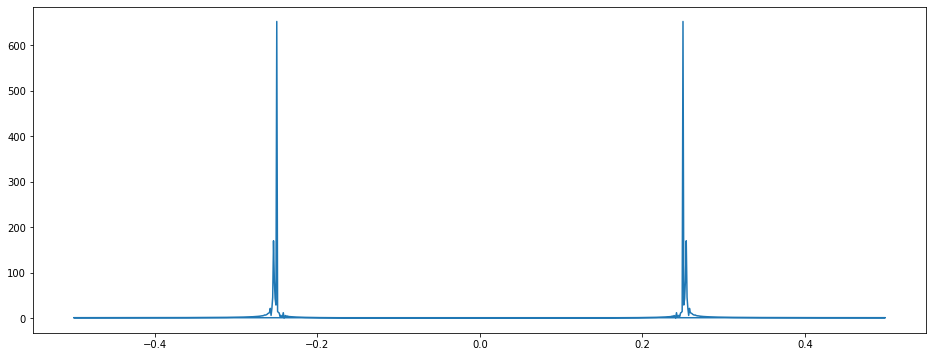

In [141]:
data = pdata.groupby("particleID").get_group(93)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

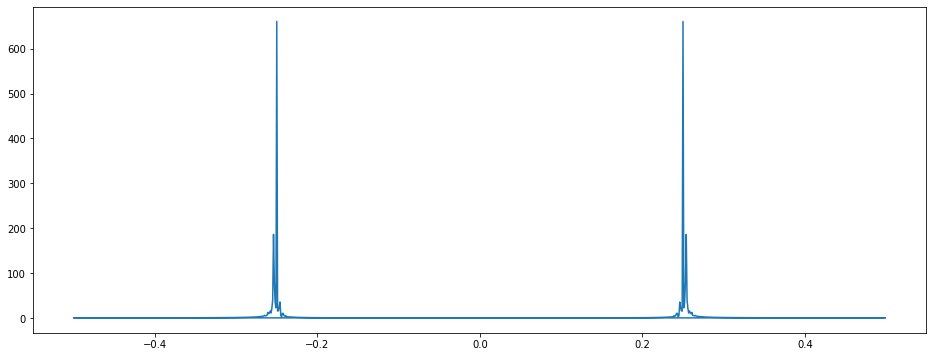

In [143]:
data = pdata.groupby("particleID").get_group(92)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

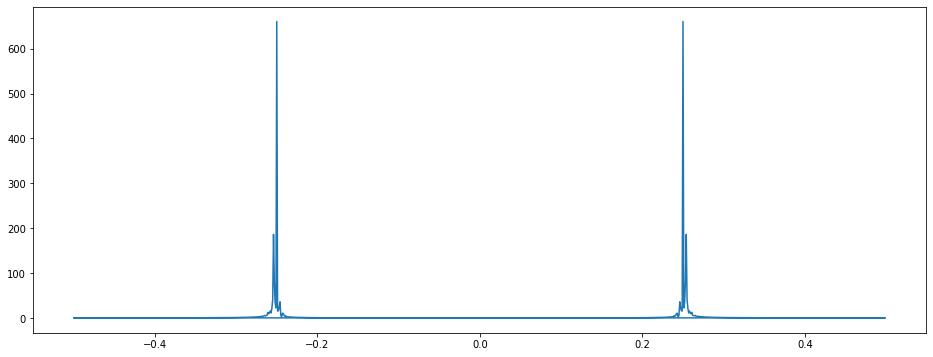

In [338]:
data = pdata.groupby("particleID").get_group(16)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

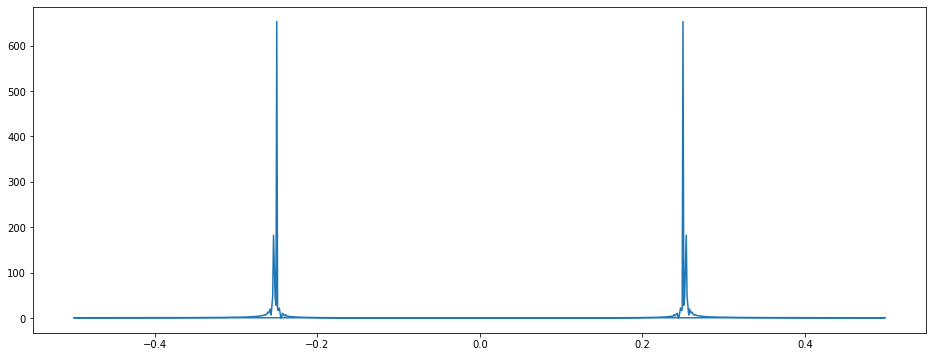

In [219]:
data = pdata.groupby("particleID").get_group(30)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

In [337]:
arr = np.array(list(zip(freq,abs(sp.real))))
loc = np.argmax(abs(sp.real))

arr[loc]

array([2.50000000e-01, 6.60528283e+02])

In [310]:
np.argmax(np.array(list(zip(freq,abs(sp.real)))))

475

In [321]:
pdata = pdata.compute()


In [391]:
tunesis = np.array(
    [
    np.fft.fftfreq(len(df))[np.argsort((np.fft.fft(df.x).real))[-3]] for _,df in pdata.groupby("particleID")
]
)

In [445]:
tune = []
tuneis = []
action = []
ids=[]
for i, df in pdata.groupby("particleID"):
    data = df["x"]
    
    sp = np.fft.fft(data)
    freq = np.fft.fftfreq(len(data))
    
    tunedata = np.array(list(zip(freq,sp.real)))
    tunedata = tunedata[tunedata[:,0]>=0]
    
    sp = tunedata[:,1]
    freq = tunedata[:,0]
    
     
#     print(np.argsort((sp.real))[-5:])
#     print(sp.real[np.argsort((sp.real))[-5:]])
#     print(freq[np.argsort((sp.real))[-5:]])
#     print("---------------------------")
    tune.append(freq[np.argsort((sp.real))[-1]])
    tuneis.append(freq[np.argsort((sp.real))[-2]])
    action.append(data.values[0]**2)
    ids.append(i)

(array([0.244, 0.246, 0.248, 0.25 , 0.252, 0.254, 0.256, 0.258, 0.26 ,
        0.262, 0.264]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

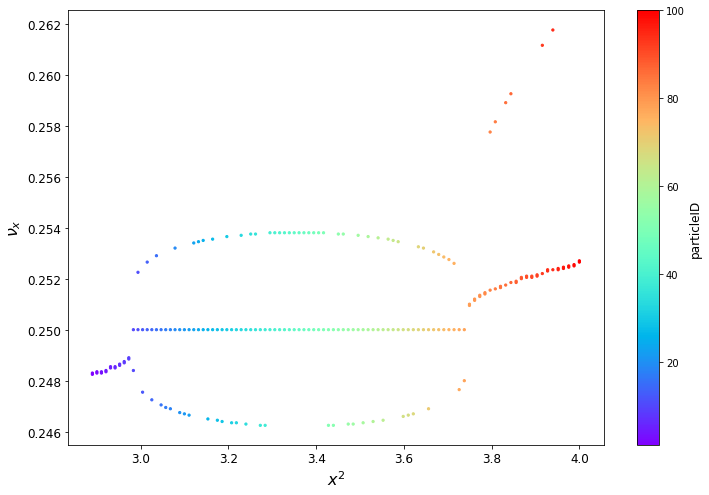

In [446]:
fig = plt.figure(figsize=(12,8))

plt.scatter(
    actions,
    tune,
    s=5,
    c=ids,
    cmap="rainbow"
)
plt.scatter(
    actions,
    tuneis,
    s=5,
    c=ids,
    cmap="rainbow")

cb =plt.colorbar()
cb.set_label("particleID",fontsize=12)
# cb.ax.set_ticks(fontsize=12)
plt.xlabel(r"$x^2$",fontsize=16)
plt.ylabel(r"$\nu_x$",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("Tune_splitting.png")

In [323]:
tunes = np.array(
    [
    np.fft.fftfreq(len(df))[np.argmax(abs(np.fft.fft(df.x).real))] for _,df in pdata.groupby("particleID")
]
)
actions = [df.x.values[0]**2+df.xp.values[0]**2+df.y.values[0]**2+df.yp.values[0]**2 for _,df in pdata.groupby("particleID")]
actions = [df.x.values[0]**2 for _,df in pdata.groupby("particleID")]
ids = [i for i, _ in pdata.groupby("particleID")]

(array([0.244, 0.246, 0.248, 0.25 , 0.252, 0.254, 0.256, 0.258, 0.26 ,
        0.262, 0.264]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

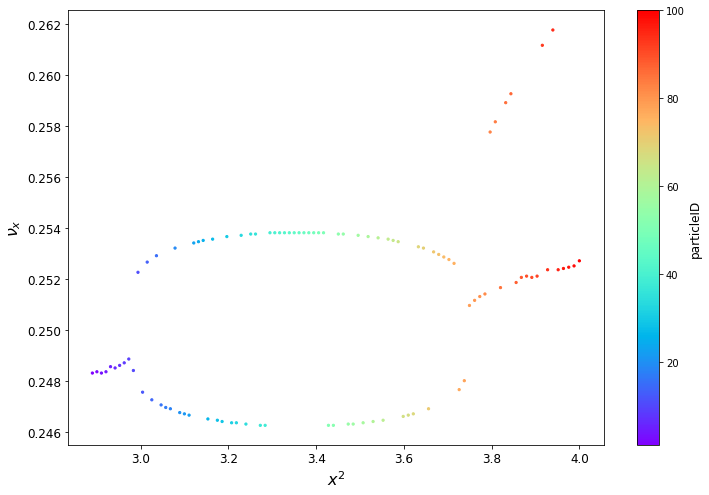

In [435]:
fig = plt.figure(figsize=(12,8))
plt.scatter(actions,abs(tunes),s=5,c=ids,cmap="rainbow", label="Main Tune")
plt.scatter(actions,abs(tunesis),s=5,c=ids,cmap="rainbow")
cb =plt.colorbar()
cb.set_label("particleID",fontsize=12)
# cb.ax.set_ticks(fontsize=12)
plt.xlabel(r"$x^2$",fontsize=16)
plt.ylabel(r"$\nu_x$",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("Tune_splitting.png")

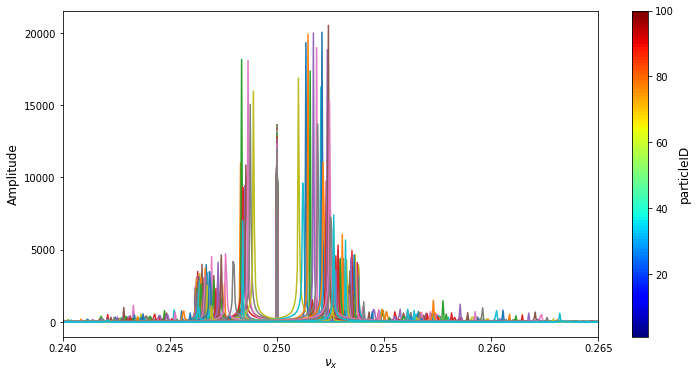

In [386]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(12,6))
freq = np.fft.fftfreq(len(df))
cmap = mpl.cm.get_cmap('jet', 100)
dummie_cax = ax.scatter(range(1,101), range(1,101), c=range(1,101), cmap=cmap)
for i, g in pdata.groupby("particleID"):
    df = g
    sp = np.fft.fft(df.x)

    ax.plot(freq,abs(sp.real))
    
plt.xlim(0.24,0.265)
plt.xlabel(r"$\nu_x$", fontsize=12)
plt.ylabel(r"Amplitude",fontsize=12)
cb =plt.colorbar(dummie_cax, label="ParticleID")
cb.set_label("particleID",fontsize=12)
plt.savefig("FFT.png")

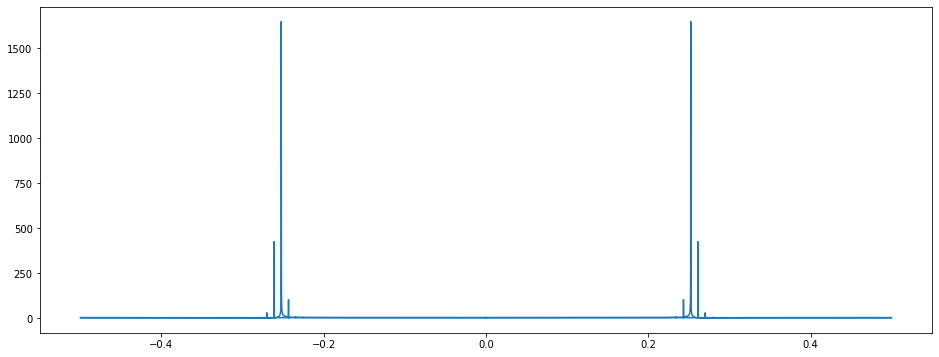

In [409]:
data = pdata.groupby("particleID").get_group(93)["x"]
sp = np.fft.fft(data)
freq = np.fft.fftfreq(len(data))
fig = plt.figure(figsize=(16,6))
plt.plot(freq,abs(sp.real) )

[5229 5049 5048 5047 5046]
[0.2524  0.2522  0.25235 0.25225 0.2523 ]
[5050 5049 5048 5235 5047]
[0.25225 0.2524  0.2523  0.26175 0.25235]


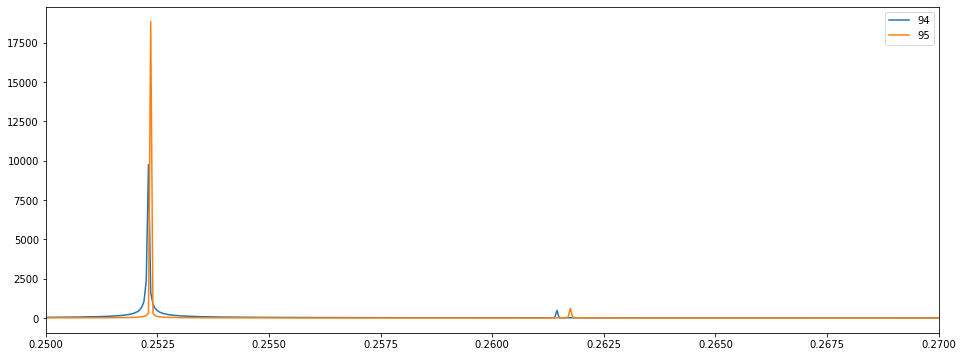

In [478]:
fig = plt.figure(figsize=(16,6))
for i in range(94,96):
    data = pdata.groupby("particleID").get_group(i)["x"]
    sp = np.fft.fft(data)
    freq = np.fft.fftfreq(len(data))
    tunedata = np.array(list(zip(freq,sp.real)))
    tunedata = tunedata[tunedata[:,0]>=0]
    sp = tunedata[:,1]
    freq = tunedata[:,0]
    
    plt.plot(freq,abs(sp.real), label=i )
    print(np.argsort((sp.real))[-5:])
#     print(sp.real[np.argsort((sp.real))[-5:]])
    print(freq[np.argsort(abs(sp.real))[-5:]])
plt.xlim(0.25,0.27)
plt.legend()
#     print(np.argsort((sp.real))[-5:])
#     print(sp.real[np.argsort((sp.real))[-5:]])
    
#     

In [ ]:
df = pdata.groupby("particleID").get_group(94)
sp = np.fft.fft(df.x)
freq = np.fft.fftfreq(len(df))

fig1, axes = plt.subplots(constrained_layout=True, figsize=(12,6))
gs = fig1.add_gridspec(1, 2)
ax1 = fig1.add_subplot(gs[0, 0])
ax2 = fig1.add_subplot(gs[0, 1])
ax1.scatter(df.x, df.xp,s=1)
ax2.scatter(df.y, df.yp,s=1)

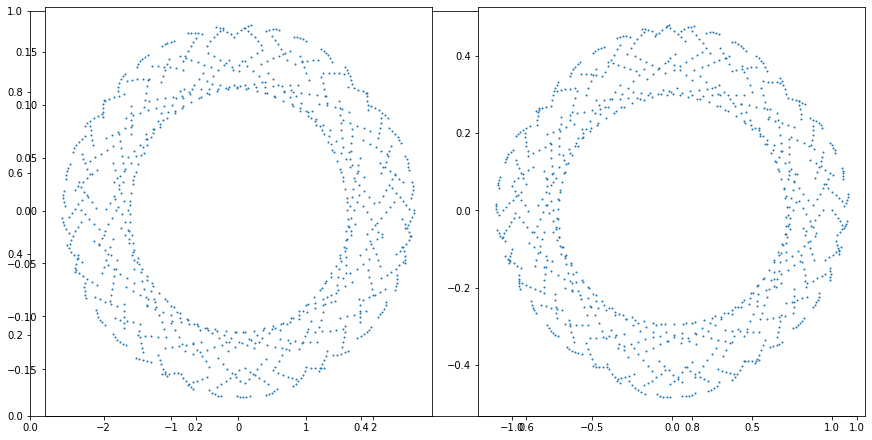

In [137]:
df = pdata.groupby("particleID").get_group(94)
fig1, axes = plt.subplots(constrained_layout=True, figsize=(12,6))
gs = fig1.add_gridspec(1, 2)
ax1 = fig1.add_subplot(gs[0, 0])
ax2 = fig1.add_subplot(gs[0, 1])
ax1.scatter(df.x, df.xp,s=1)
ax2.scatter(df.y, df.yp,s=1)

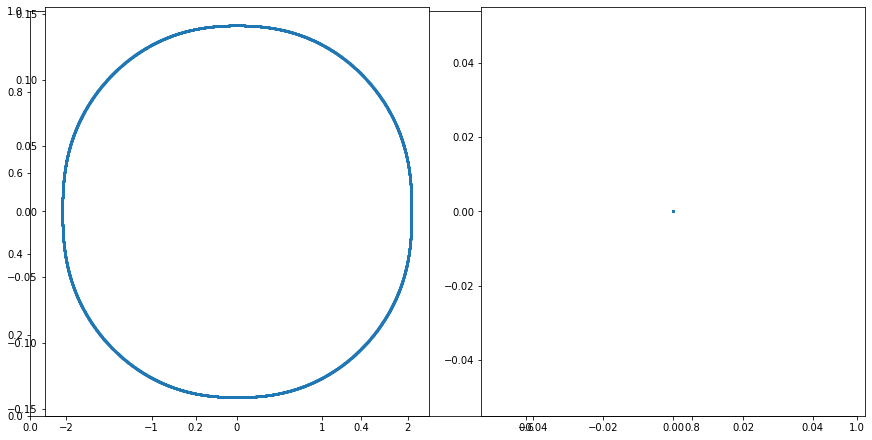

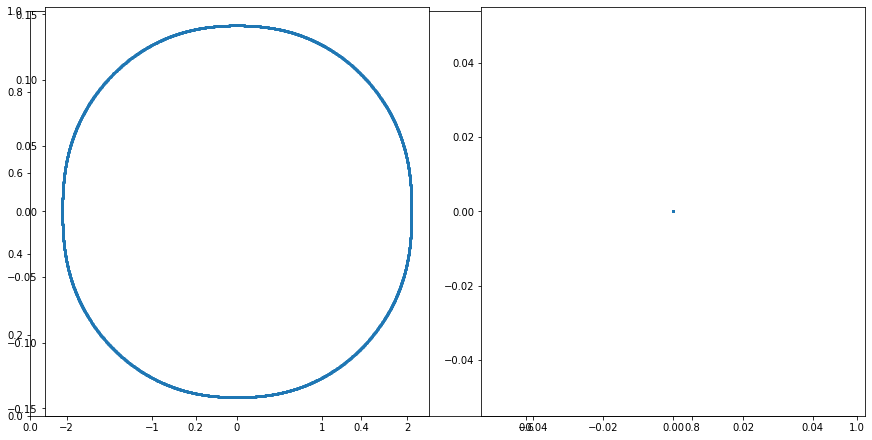

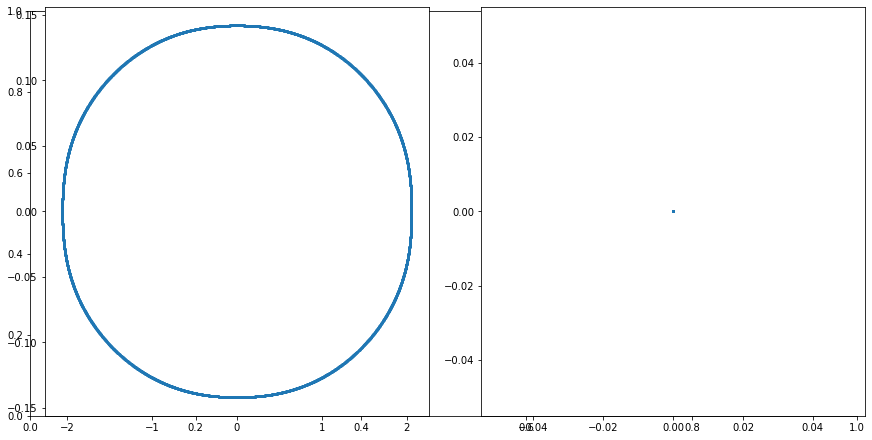

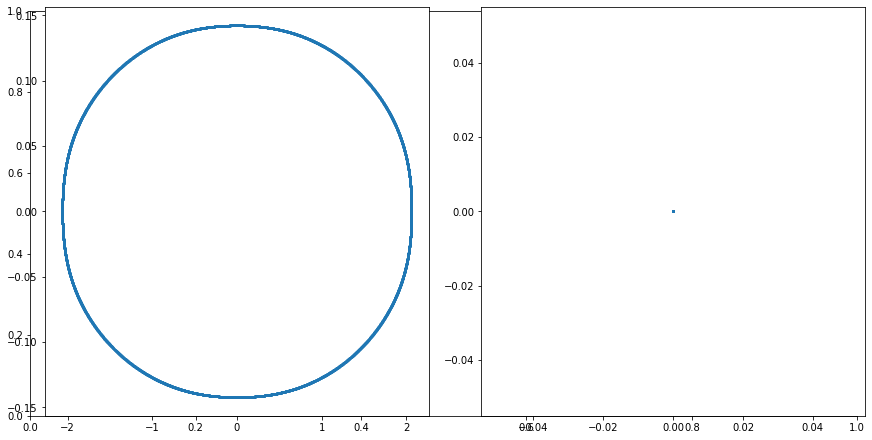

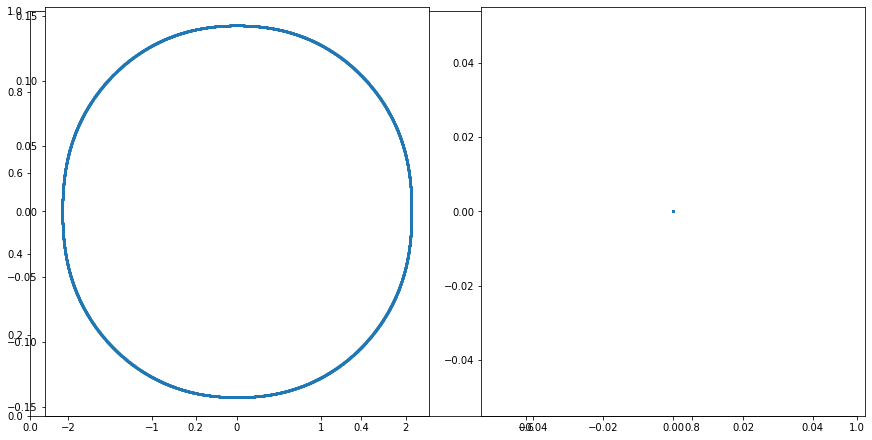

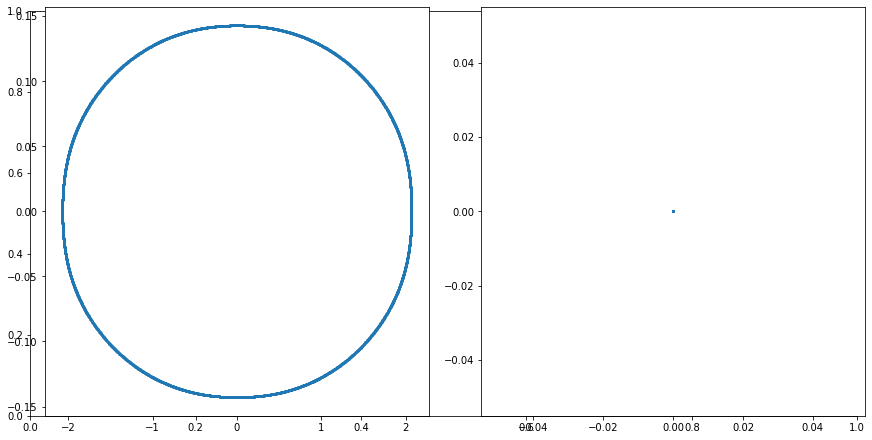

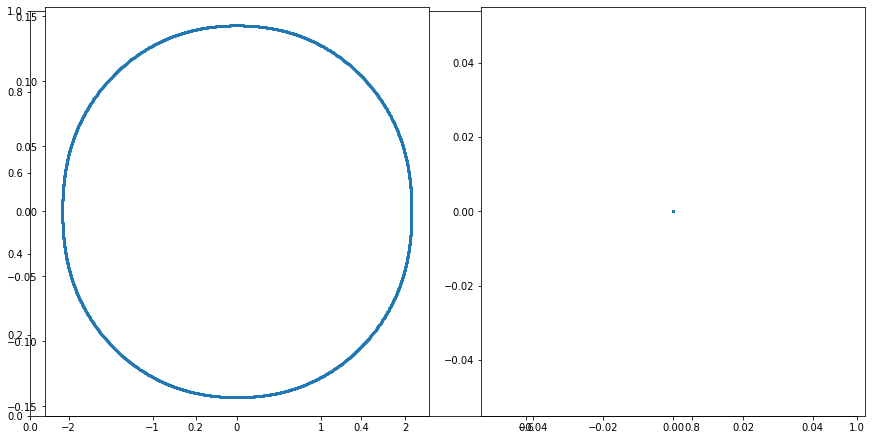

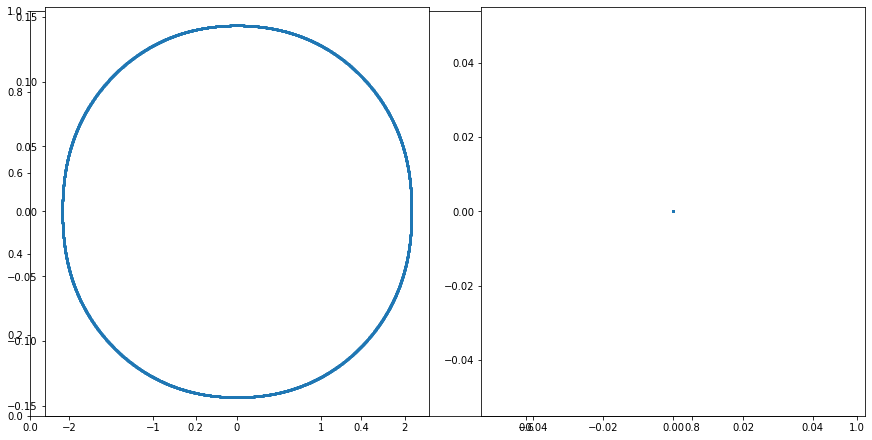

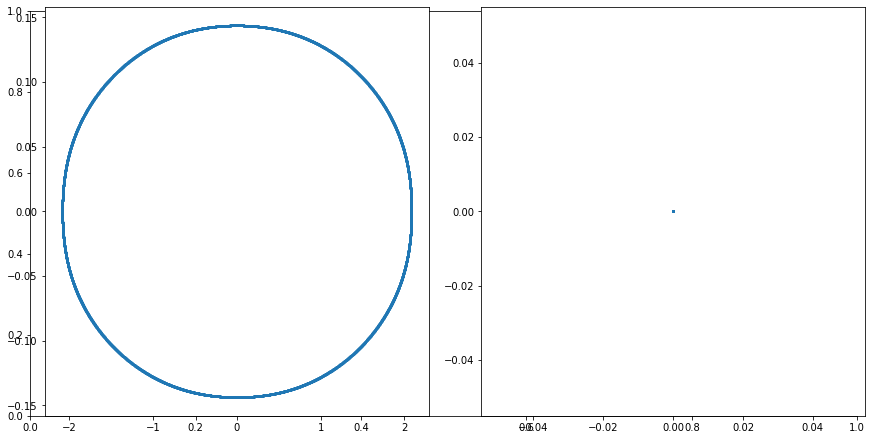

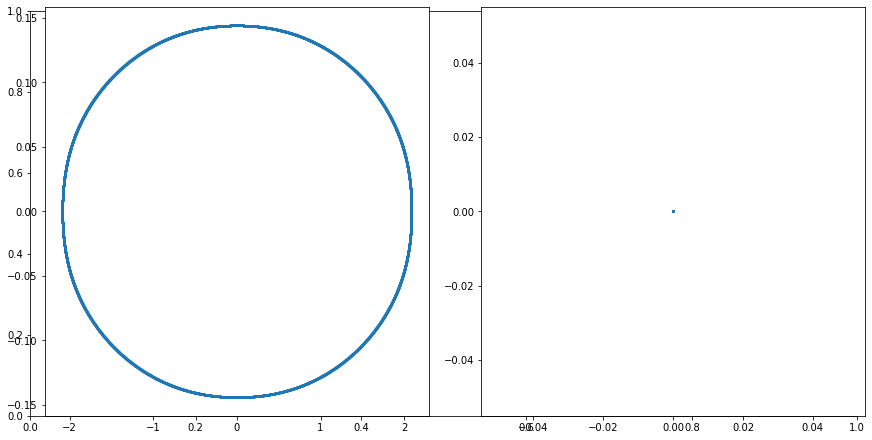

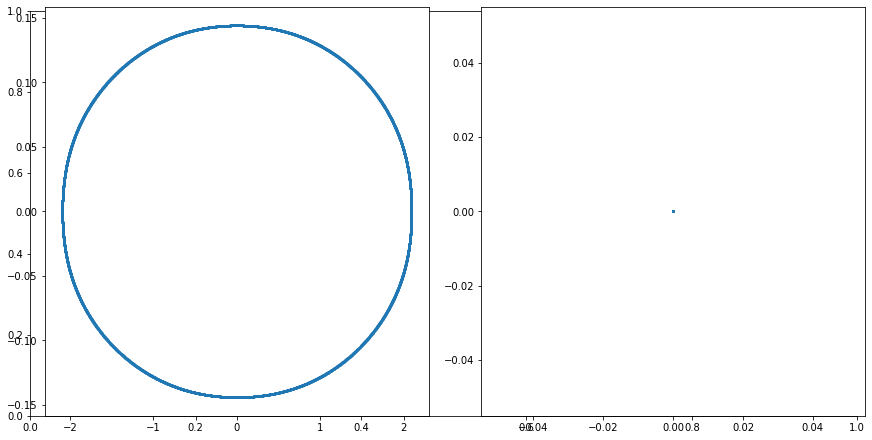

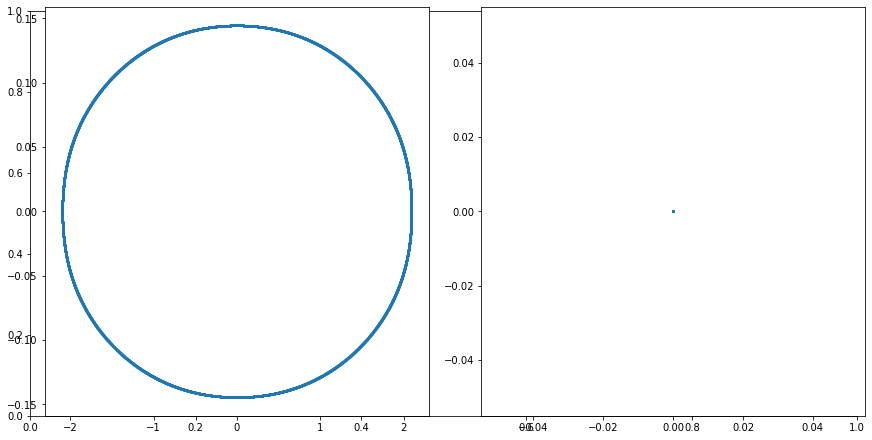

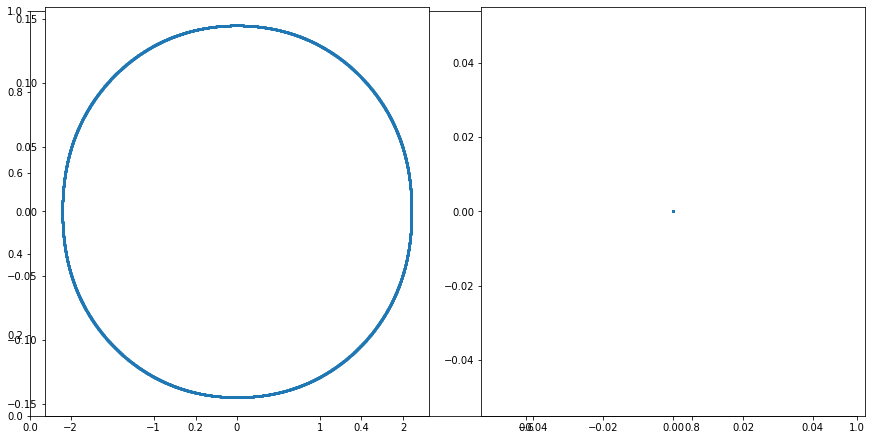

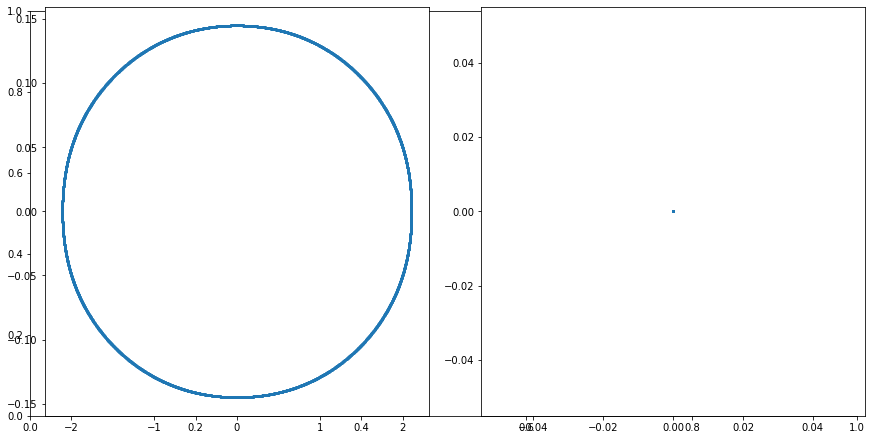

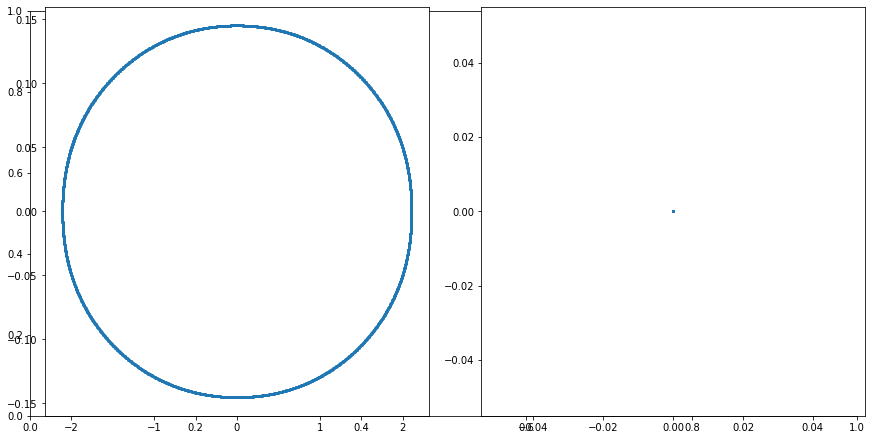

In [397]:
pdatag =pdata.groupby("particleID")
for i in range(85,100):
    df = pdatag.get_group(i)
    fig1, axes = plt.subplots(constrained_layout=True, figsize=(12,6))
    gs = fig1.add_gridspec(1, 2)
    ax1 = fig1.add_subplot(gs[0, 0])
    ax2 = fig1.add_subplot(gs[0, 1])
    ax1.scatter(df.x, df.xp,s=1)
    ax2.scatter(df.y, df.yp,s=1)

In [275]:
sddsp.sddsplot_base(
    columnNames="y,yp",
    file="temp-001.w1",
    scale="0,0,0,0",
    graph="symb,vary=subtype,fill",
    order="spectral",
    split="columnBin=particleID"
)


Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=y,yp temp-001.w1 -scale=0,0,0,0 -graph=symb,vary=subtype,fill -order=spectral -split=columnBin=particleID


In [216]:
er.track_simple()

bash run_pelegant.sh
bash run_pelegant.sh temp.ele


In [213]:
er.simple_single_particle_track()

Shape: (1, 6) - Number of paritcles: 1 
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.32681686e+03 1.00000000e+00]]
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount
bash run_pelegant.sh
bash run_pelegant.sh temp.ele


In [164]:
sddsp.sddsplot_base(columnNames="x,xp",graph="sym,vary=subtype,fill,scale=1",file="temp-001.w1", order="spectral",split="page")

Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=x,xp -graph=sym,vary=subtype,fill,scale=1 temp-001.w1 -order=spectral -split=page


In [194]:
sddsp.sddsplot_base(columnNames="x,xp",graph="sym,vary=subtype,fill,scale=1",file="temp-001.w1",order="spectral",
                    split="pages,columnBin=particleID", separate="pages", scale="-0.001,0.001,0,0"
                   )

Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=x,xp -graph=sym,vary=subtype,fill,scale=1 temp-001.w1 -order=spectral -split=pages,columnBin=particleID -separate=pages -scale=-0.001,0.001,0,0


In [94]:
sc = SDDSCommand(sif)
sc.getCommand(
    'plaindata2sdds',
    file_1='testplain.dat',
    file_2='testplain.txt',
    inputMode='ascii',
    outputMode='ascii',
    separator=' ',
    column_1='x,double,units=m',
    column_2='xp,double',
    noRowCount=None
)

'/home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds testplain.dat testplain.txt -inputMode=ascii -outputMode=ascii "-separator=  " -column=x,double,units=m -column=xp,double -noRowCount'

In [220]:
pdata = sddsp.readParticleData()

False
temp-001.w1
temp-001.w1
['x', 'xp', 'y', 'yp', 't', 'p', 'dt', 'particleID']
Warning - auto filename set
Changed from temp-001.w1 to temp-001.w1.txt
Warning - auto filetype set
Changed from 0 to 1


In [223]:
pdata.groupby("particleID").get_group(1)


,x,xp,y,yp,t,p,dt,particleID,Turn
0,0.0,0.0,0.0,0.0,0.000000e+00,3331.806224,0.000000e+00,1,1
8,0.0,0.0,0.0,0.0,2.725552e-08,3331.806224,-3.685414e-18,1,2
16,0.0,0.0,0.0,0.0,5.451105e-08,3331.806224,-7.370828e-18,1,3
24,0.0,0.0,0.0,0.0,8.176657e-08,3331.806224,-1.105624e-17,1,4
32,0.0,0.0,0.0,0.0,1.090221e-07,3331.806224,-1.474166e-17,1,5
...,...,...,...,...,...,...,...,...,...
1090,0.0,0.0,0.0,0.0,2.711925e-05,3331.806224,-3.666636e-15,1,996
1091,0.0,0.0,0.0,0.0,2.714650e-05,3331.806224,-3.670319e-15,1,997
1092,0.0,0.0,0.0,0.0,2.717376e-05,3331.806224,-3.674005e-15,1,998
1093,0.0,0.0,0.0,0.0,2.720101e-05,3331.806224,-3.677688e-15,1,999


In [71]:
pd.DataFrame([
    {
        'x':0.000,
        'px':1.
    },
     {
        'x':5.000,
        'px':1.
    }
]).to_csv('testplain.dat',sep=' ',header=None, index=False)

In [55]:
cmdstr = '{} plaindata2sdds testplain.dat testplain.txt -inputMode=ascii -outputMode=ascii -separator=\",\" '.format(sif)
cmdstr += '-column=x,double,units=m '
cmdstr += '-column=xp,double '

In [34]:
import subprocess as subp

In [59]:
p = subp.Popen(cmdstr,shell=True,stdout=subp.PIPE)

In [60]:
out, err = p.communicate()

In [11]:
pd.DataFrame(GenerateNDimCoordinateGrid(6,2))

Shape: (64, 6) - Number of paritcles: 64 


,0,1,2,3,4,5,6
0,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,1.0
1,0.000001,0.000001,0.000001,0.000001,0.000001,0.000100,2.0
2,0.000001,0.000001,0.000001,0.000001,0.000100,0.000001,3.0
3,0.000001,0.000001,0.000001,0.000001,0.000100,0.000100,4.0
4,0.000001,0.000001,0.000001,0.000100,0.000001,0.000001,5.0
...,...,...,...,...,...,...,...
59,0.000100,0.000100,0.000100,0.000001,0.000100,0.000100,60.0
60,0.000100,0.000100,0.000100,0.000100,0.000001,0.000001,61.0
61,0.000100,0.000100,0.000100,0.000100,0.000001,0.000100,62.0
62,0.000100,0.000100,0.000100,0.000100,0.000100,0.000001,63.0


In [62]:
print(cmdstr)

/home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds testplain.dat testplain.txt -inputMode=ascii -outputMode=ascii -separator="," -column=x,double,units=m -column=xp,double 


In [438]:
{str(k):v for k,v in zip(range(1,7),np.zeros((6,1)))}

{'1': array([0.]),
 '2': array([0.]),
 '3': array([0.]),
 '4': array([0.]),
 '5': array([0.]),
 '6': array([0.])}

In [429]:
arr = np.array(range(1,65)).reshape((64,1))
np.hstack((lat,arr))

array([[1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 2.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 3.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-04, 4.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-06, 5.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-04, 6.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-04, 1.0e-06, 7.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e-04, 1.0e-04, 8.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-06, 1.0e-06, 9.0e+00],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-06, 1.0e-04, 1.0e+01],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-04, 1.0e-06, 1.1e+01],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-06, 1.0e-04, 1.0e-04, 1.2e+01],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-04, 1.0e-06, 1.0e-06, 1.3e+01],
       [1.0e-06, 1.0e-06, 1.0e-04, 1.0e-04, 1.0e-06, 1.0e-04, 1.

In [317]:
cvector

array([[ 0.19828143],
       [-0.00747537],
       [ 0.        ],
       [ 0.        ],
       [ 6.50401069],
       [ 0.        ]])

In [318]:
Rmat

array([[ 9.21379908e-01,  4.85285836e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.51601941e-02],
       [-3.10129371e-01,  9.17206334e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.04732576e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.08070398e+00,
         5.12846498e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.27033351e-01,
         1.07915779e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07637968e-03,  1.18701251e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.04920302e-04,             nan,             nan,
                    nan,             nan,             nan],
       [-3.08585890e-03, -2.30619871e-02,             nan,
                    nan,             nan,             nan],
       [ 0.00000000e+00,  0.00000000e+00,  6.995

In [329]:
elementmat.columns

Index(['s', 'ElementName', 'ElementOccurence', 'ElementType', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6',
       ...
       'T652', 'T653', 'T654', 'T655', 'T661', 'T662', 'T663', 'T664', 'T665',
       'T666'],
      dtype='object', length=172)

In [244]:
os.listdir()

['pyelegant',
 'README.rst',
 'tests',
 'pyproject.toml',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'poetry.lock',
 'temp.ele',
 'temp.twi',
 'temp.cen',
 'temp-001.w1',
 'temp-001.w2',
 'temp.mat',
 'temp.params',
 'temp.sdds',
 'temp.done']

In [319]:
sddsf = SDDS(sif,"temp.sdds",0)

In [320]:
sddsf.getColumnList()

['s',
 'ElementName',
 'ElementOccurence',
 'ElementType',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'R11',
 'R12',
 'R13',
 'R14',
 'R15',
 'R16',
 'R21',
 'R22',
 'R23',
 'R24',
 'R25',
 'R26',
 'R31',
 'R32',
 'R33',
 'R34',
 'R35',
 'R36',
 'R41',
 'R42',
 'R43',
 'R44',
 'R45',
 'R46',
 'R51',
 'R52',
 'R53',
 'R54',
 'R55',
 'R56',
 'R61',
 'R62',
 'R63',
 'R64',
 'R65',
 'R66',
 'T111',
 'T121',
 'T122',
 'T131',
 'T132',
 'T133',
 'T141',
 'T142',
 'T143',
 'T144',
 'T151',
 'T152',
 'T153',
 'T154',
 'T155',
 'T161',
 'T162',
 'T163',
 'T164',
 'T165',
 'T166',
 'T211',
 'T221',
 'T222',
 'T231',
 'T232',
 'T233',
 'T241',
 'T242',
 'T243',
 'T244',
 'T251',
 'T252',
 'T253',
 'T254',
 'T255',
 'T261',
 'T262',
 'T263',
 'T264',
 'T265',
 'T266',
 'T311',
 'T321',
 'T322',
 'T331',
 'T332',
 'T333',
 'T341',
 'T342',
 'T343',
 'T344',
 'T351',
 'T352',
 'T353',
 'T354',
 'T355',
 'T361',
 'T362',
 'T363',
 'T364',
 'T365',
 'T366',
 'T411',
 'T421',
 'T422',
 'T431',
 'T432',

In [321]:
sddsf.getColumnValues()

,s,ElementName,ElementOccurence,ElementType,C1,C2,C3,C4,C5,C6,...,T652,T653,T654,T655,T661,T662,T663,T664,T665,T666
0,0.0,_BEG_,1,MARK,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,W1,1,WATCH,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,QF1,1,KQUAD,0.003929,0.015508,0.0,0.0,0.500020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,W2,1,WATCH,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,DL,1,DRIF,0.023261,0.000000,0.0,0.0,1.500180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,QD1,1,KQUAD,0.077117,0.039176,0.0,0.0,2.501343,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,DL,2,DRIF,0.082025,0.000000,0.0,0.0,1.502243,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.5,QF2,1,KQUAD,0.011950,-0.062159,0.0,0.0,0.500224,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
sddsf.getParameterValues()

ParameterName
Step        0.000000
nux         0.337132
dnux/dp    -0.608545
dnux/dp2    0.000000
dnux/dp3    0.000000
              ...   
Jy          1.000000
Sdelta0     0.000413
taudelta    0.029556
Jdelta      2.759485
U0          0.000904
Name: ParameterValue, Length: 75, dtype: float64

In [267]:
sddsf.command_history

AttributeError: 'SDDS' object has no attribute 'command_history'

In [357]:
with open("temp.mat","r") as f:
    mdata = f.read()

In [254]:
import re

In [359]:
dfmat = pd.read_csv(StringIO("\n".join(mdata.split("full",1)[1].splitlines()[1:])),delim_whitespace=True,names=[1,2,3,4,5,6])
dfmat.index
c = dfmat.loc[dfmat.index=='C:'].values.T
R = dfmat.loc[dfmat.index.str.contains('R')].values
T = dfmat.loc[dfmat.index.str.contains('T')]
Q = dfmat.loc[dfmat.index.str.contains('Q')]

T_dict = {}
for _, row in T.iterrows():
    _basekey = row.name[:-1]
    for c in T.columns:
        _key = _basekey + str(c)
        _value = row[c]
        if not pd.isna(_value):
            T_dict[_key] = _value
            
Q_dict = {}
for _, row in Q.iterrows():
    _basekey = row.name[:-1]
    for c in Q.columns:
        _key = _basekey + str(c)
        _value = row[c]
        if not pd.isna(_value):
            Q_dict[_key] = _value

In [354]:
Q_dict

{'Q1111': -0.001904482537989718,
 'Q1211': 0.02321585076812191,
 'Q1221': -0.1073232703592546,
 'Q1222': -0.01867888208006125,
 'Q1311': 0.0,
 'Q1321': 0.0,
 'Q1322': 0.0,
 'Q1331': -0.0020441990690811987,
 'Q1332': 0.008244891799741708,
 'Q1333': 0.0,
 'Q1411': 0.0,
 'Q1421': 0.0,
 'Q1422': 0.0,
 'Q1431': -0.01758311318143466,
 'Q1432': 0.07951650314394225,
 'Q1433': 0.0,
 'Q1441': -0.04197329567768597,
 'Q1442': 0.006412968347645222,
 'Q1443': 0.0,
 'Q1444': 0.0,
 'Q1511': 0.0,
 'Q1521': 0.0,
 'Q1522': 0.0,
 'Q1531': 0.0,
 'Q1532': 0.0,
 'Q1533': 0.0,
 'Q1541': 0.0,
 'Q1542': 0.0,
 'Q1543': 0.0,
 'Q1544': 0.0,
 'Q1551': 0.0,
 'Q1552': 0.0,
 'Q1553': 0.0,
 'Q1554': 0.0,
 'Q1555': 0.0,
 'Q1611': 0.0,
 'Q1621': 0.0,
 'Q1622': 0.0,
 'Q1631': 0.0,
 'Q1632': 0.0,
 'Q1633': 0.0,
 'Q1641': 0.0,
 'Q1642': 0.0,
 'Q1643': 0.0,
 'Q1644': 0.0,
 'Q1651': 0.0,
 'Q1652': 0.0,
 'Q1653': 0.0,
 'Q1654': 0.0,
 'Q1655': 0.0,
 'Q1661': -0.07674841561169675,
 'Q1662': -0.012982339511862059,
 'Q1663': 0.0,


In [340]:
T_dict

{'T111': 0.00020492030180169232,
 'T121': -0.003085858899168733,
 'T122': -0.02306198713883873,
 'T131': 0.0,
 'T132': 0.0,
 'T133': 6.99578726123829e-05,
 'T141': 0.0,
 'T142': 0.0,
 'T143': 0.00107192439547517,
 'T144': -0.007470273096704044,
 'T151': 0.0,
 'T152': 0.0,
 'T153': 0.0,
 'T154': 0.0,
 'T155': 0.0,
 'T161': 0.07752838391712642,
 'T162': 0.013060693759157641,
 'T163': 0.0,
 'T164': 0.0,
 'T165': 0.0,
 'T166': -0.015010576682535809,
 'T211': -0.001102302822073352,
 'T221': 0.006932962779024894,
 'T222': -0.088979426643837,
 'T231': 0.0,
 'T232': 0.0,
 'T233': -0.0004075807099255565,
 'T241': 0.0,
 'T242': 0.0,
 'T243': -0.002818792458717682,
 'T244': -0.03087647290631825,
 'T251': 0.0,
 'T252': 0.0,
 'T253': 0.0,
 'T254': 0.0,
 'T255': 0.0,
 'T261': 0.3017938737439223,
 'T262': 0.07752838391712642,
 'T263': 0.0,
 'T264': 0.0,
 'T265': 0.0,
 'T266': -0.05927724410525013,
 'T311': 0.0,
 'T321': 0.0,
 'T322': 0.0,
 'T331': -0.0001447358904008001,
 'T332': 0.001102772292995055

In [364]:
import numpy as np
np.zeros((6,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [360]:
print(list(dfmat.index))

['C:', 'R1:', 'R2:', 'R3:', 'R4:', 'R5:', 'R6:', 'T11:', 'T12:', 'T13:', 'T14:', 'T15:', 'T16:', 'T21:', 'T22:', 'T23:', 'T24:', 'T25:', 'T26:', 'T31:', 'T32:', 'T33:', 'T34:', 'T35:', 'T36:', 'T41:', 'T42:', 'T43:', 'T44:', 'T45:', 'T46:', 'T51:', 'T52:', 'T53:', 'T54:', 'T55:', 'T56:', 'T61:', 'T62:', 'T63:', 'T64:', 'T65:', 'T66:', 'Q111:', 'Q121:', 'Q122:', 'Q131:', 'Q132:', 'Q133:', 'Q141:', 'Q142:', 'Q143:', 'Q144:', 'Q151:', 'Q152:', 'Q153:', 'Q154:', 'Q155:', 'Q161:', 'Q162:', 'Q163:', 'Q164:', 'Q165:', 'Q166:', 'Q211:', 'Q221:', 'Q222:', 'Q231:', 'Q232:', 'Q233:', 'Q241:', 'Q242:', 'Q243:', 'Q244:', 'Q251:', 'Q252:', 'Q253:', 'Q254:', 'Q255:', 'Q261:', 'Q262:', 'Q263:', 'Q264:', 'Q265:', 'Q266:', 'Q311:', 'Q321:', 'Q322:', 'Q331:', 'Q332:', 'Q333:', 'Q341:', 'Q342:', 'Q343:', 'Q344:', 'Q351:', 'Q352:', 'Q353:', 'Q354:', 'Q355:', 'Q361:', 'Q362:', 'Q363:', 'Q364:', 'Q365:', 'Q366:', 'Q411:', 'Q421:', 'Q422:', 'Q431:', 'Q432:', 'Q433:', 'Q441:', 'Q442:', 'Q443:', 'Q444:', 'Q451:

In [358]:
mdata

'line name: ACC\nline has 7 elements\nWATCH W1 at z=0.000000e+00m, theta=0.000000e+00, part of ACC:\n    FRACTION = 1 \n    START_PID = -1 \n    END_PID = -1 \n    INTERVAL = 1 \n    START_PASS = 0 \n    END_PASS = -1 \n    FILENAME = "%s-%03ld.w1"\n    LABEL = ""\n    MODE = "COORDINATES"\n    X_DATA = 1 \n    Y_DATA = 1 \n    LONGIT_DATA = 1 \n    EXCLUDE_SLOPES = 0 \n    FLUSH_INTERVAL = 100 \n    SPARSE_INTERVAL = 1 \n    DISABLE = 0 \n    USE_DISCONNECT = 0 \n    INDEX_OFFSET = 0 \n    REFERENCE_FREQUENCY = -1 \nKQUAD QF1 at z=5.000000e-01m, theta=0.000000e+00, part of ACC:\n    L = 0.5 M\n    K1 = 0.637 1/M$a2$n\n    TILT = 0 RAD\n    BORE = 0 M\n    B = 0 T\n    DX = 0.05 M\n    DY = 0 M\n    DZ = 0 M\n    FSE = 0 \n    N_KICKS = 16 \n    HKICK = 0 RAD\n    VKICK = 0 RAD\n    HCALIBRATION = 1 \n    VCALIBRATION = 1 \n    HSTEERING = 0 \n    VSTEERING = 0 \n    SYNCH_RAD = 0 \n    SYSTEMATIC_MULTIPOLES = ""\n    EDGE_MULTIPOLES = ""\n    RANDOM_MULTIPOLES = ""\n    STEERING_MULTI

In [6]:
with open("/home/mti/tmp/sdds/test-001.w1", "rb") as f:
    data = f.read()

In [7]:
data[:2000]

b'SDDS1\n!# little-endian\n&description text="watch-point phase space--input: test.ele  lattice: b2_design.lte", contents="watch-point phase space", &end\n&parameter name=Step, description="Simulation step", type=long, &end\n&parameter name=pCentral, symbol="p$bcen$n", units="m$be$nc", description="Reference beta*gamma", type=double, &end\n&parameter name=Charge, units=C, description="Bunch charge before sampling", type=double, &end\n&parameter name=Particles, description="Number of particles before sampling", type=long, &end\n&parameter name=IDSlotsPerBunch, description="Number of particle ID slots reserved to a bunch", type=long, &end\n&parameter name=SVNVersion, description="SVN version number", type=string, fixed_value=unknown, &end\n&parameter name=SampledCharge, units=C, description="Sampled charge", type=double, &end\n&parameter name=SampledParticles, description="Sampled number of particles", type=long, &end\n&parameter name=Pass, type=long, &end\n&parameter name=PassLength, un

In [8]:
p = re.compile(b"param.*")

In [9]:
re.findall(p,data)

[b'parameter name=Step, description="Simulation step", type=long, &end',
 b'parameter name=pCentral, symbol="p$bcen$n", units="m$be$nc", description="Reference beta*gamma", type=double, &end',
 b'parameter name=Charge, units=C, description="Bunch charge before sampling", type=double, &end',
 b'parameter name=Particles, description="Number of particles before sampling", type=long, &end',
 b'parameter name=IDSlotsPerBunch, description="Number of particle ID slots reserved to a bunch", type=long, &end',
 b'parameter name=SVNVersion, description="SVN version number", type=string, fixed_value=unknown, &end',
 b'parameter name=SampledCharge, units=C, description="Sampled charge", type=double, &end',
 b'parameter name=SampledParticles, description="Sampled number of particles", type=long, &end',
 b'parameter name=Pass, type=long, &end',
 b'parameter name=PassLength, units=m, type=double, &end',
 b'parameter name=PassCentralTime, units=s, type=double, &end',
 b'parameter name=ElapsedTime, unit

In [10]:
class SDDS:
    """
    Class for interacting with SDDS files.
    """

    ENCODING = "utf-8"
    
    NUMTYPES = {
        "float": ">f", 
        "double": ">d", 
        "short": ">i2",
        "long": ">i4", 
        "llong": ">i8", 
        "char": ">i1", 
        "boolean": ">i1"
    }
    NUMTYPES_SIZES = {
        "float": 4, 
        "double": 8, 
        "short": 2,
        "long": 4, 
        "llong": 8, 
        "char": 1, 
        "boolean": 1
    }
    NUMTYPES_CAST = {
        "float": float, 
        "double": float, 
        "short": int,
        "long": int, 
        "llong": int, 
        "char": str, 
        "boolean": int
    }

    def __init__(self, filetype: int):
        self.filetype = filetype
        self.parameters = None

    def load(self, file):
        if self.filetype == 1:
            "ASCII FORMAT"
            with open(file, "r") as f:
                self.raw_content = f.read()

        else:
            "BINARY FORMAT"
            with open(file, "rb") as f:
                self.raw_content = f.read()

        # process

    def convert(self):
        # switch format
        pass

    def getColumnData(self):
        # load column data in dataframe
        pass

    def getParameterData(self):
        # load parameter data in dataframe
        if self.parameters is None:
            if self.filetype != 1:
                p = re.compile(b"parameter.*")
                params_list = re.findall(p, self.raw_content)
                params_list = [pa.split(b"parameter ",1)[1] for pa in params_list]
                params_list = [pa.split(b", &end",1)[0] for pa in params_list]
                params_list = [{s.split(b"=")[0].decode(self.ENCODING):s.split(b"=")[1].decode(self.ENCODING) for s in pa.split(b",")} for pa in params_list]
                return pd.DataFrame(params_list)
        else:
            return self.parameters

In [11]:
bintest = SDDS(0)
bintest.load("/home/mti/tmp/sdds/test-001.w1")

In [12]:
bintest.raw_content[:10]

b'SDDS1\n!# l'

In [13]:
bintest.getParameterData()
    

,name,description,type,symbol,units,fixed_value,format_string
0,Step,"""Simulation step""",long,NaN,NaN,NaN,NaN
1,pCentral,"""Reference beta*gamma""",double,"""p$bcen$n""","""m$be$nc""",NaN,NaN
2,Charge,"""Bunch charge before sampling""",double,NaN,C,NaN,NaN
3,Particles,"""Number of particles before sampling""",long,NaN,NaN,NaN,NaN
4,IDSlotsPerBunch,"""Number of particle ID slots reserved to a bunch""",long,NaN,NaN,NaN,NaN
5,SVNVersion,"""SVN version number""",string,NaN,NaN,unknown,NaN
6,SampledCharge,"""Sampled charge""",double,NaN,C,NaN,NaN
7,SampledParticles,"""Sampled number of particles""",long,NaN,NaN,NaN,NaN
8,Pass,NaN,long,NaN,NaN,NaN,NaN
9,PassLength,NaN,double,NaN,m,NaN,NaN


In [57]:
(b'parameter name=Step, description="Simulation step", type=long, &end').split(b",")

[b'parameter name=Step',
 b' description="Simulation step"',
 b' type=long',
 b' &end']

In [14]:
testfile = "/home/mti/tmp/sdds/test-001.w1"
testfile = "/home/mti/tmp/sdds/test.twi"
sif = "/home/mti/gitlab-hzb/containers/bin/pelegant.sif"
import subprocess as subp
from dask import dataframe as dd
from io import StringIO

In [191]:
class SDDS:
    """
    Class for interacting with SDDS files.
    """

    def __init__(self, sif: str, filename: str, filetype: int):
        self.sif = sif
        self.filetype = filetype
        self.filename = filename
        self.columnlist = None

    def load(self):
        if self.filetype == 1:
            "ASCII FORMAT"
            with open(self.filename, "r") as f:
                self.raw_content = f.read()

        else:
            "BINARY FORMAT"
            with open(self.filename, "rb") as f:subl
                self.raw_content = f.read()

        # process

    def convert(self, outfile):
        if self.filetype == 0:
            converted_filename = self.filename + ".txt"
            if outfile is not None:
                converted_filename = outfile

            cmdstr = "{} sddsconvert -ascii {} {}".format(
                self.sif, self.filename, converted_filename
            )
        else:
            converted_filename = self.filename + ".bin"
            if outfile is not None:
                converted_filename = outfile
            cmdstr = "{} sddsconvert -binary {} {}".format(
                self.sif, self.filename, converted_filename
            )
        self.filename = converted_filename
        self.filetype = abs(1-self.filetype)
        with open(os.devnull, "w") as f:
            subp.call(shlex.split(cmdstr), stdout=f)
            
    def process_scan(self):
        cmdstr = "{} sddsprocess -define=column,step,Step {} {}_processed.{}".format(
            self.sif, self.filename, *self.filename.split(".")
        )
        print(cmdstr)
        p = subp.Popen(cmdstr, stdout=subp.PIPE, shell=True)
#         subp.run(cmdstr, check=True, shell=True)
#         (output, err) = p.communicate()
#         print(output)
#         print(err)
        self.filename = "{}_processed.{}".format(*self.filename.split("."))


    def getColumnList(self):
        # load column data in dataframe
        cmdstr = "{} sddsquery -columnList {}".format(self.sif, self.filename)
        p = subp.Popen(cmdstr, stdout=subp.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        self.columnlist = [l.decode("utf-8") for l in output.splitlines()]
        return self.columnlist
    

    def getParameterList(self):
        # load parameter data in dataframe
        cmdstr = "{} sddsquery -parameterList {}".format(self.sif, self.filename)
        p = subp.Popen(cmdstr, stdout=subp.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        return [l.decode("utf-8") for l in output.splitlines()]
    
    def getColumnValues(self):
        if self.columnlist is None:
            self.getColumnList()
        
        if os.path.getsize(self.filename) > 100e6:
            print("File is large, output redirected to file {}".format(self.filename + "_columnvalues.dat"))
            cmdstr = "{} sdds2stream -col={} {} > {}".format(
            sif, ",".join(self.columnlist), self.filename, self.filename + "_columnvalues.dat")
            return self.filename + "_columnvalues.dat"
        else:
            cmdstr = "{} sdds2stream -col={} {}".format(
                sif, ",".join(self.columnlist), self.filename)
            p = subp.Popen(cmdstr, stdout=subp.PIPE, shell=True)
            (output, err) = p.communicate()
            p_status = p.wait()
            output = output.decode("utf-8")
            output = pd.read_csv(StringIO(output),names=self.columnlist, delim_whitespace=True)
            return output
            
    def getParameterValues(self):
        cmdstr = "{} sddsprintout -parameters=* -spreadsheet {}".format(self.sif, self.filename)
        print(cmdstr)
        p = subp.Popen(cmdstr, stdout=subp.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        df = pd.read_csv(
            StringIO(output.decode("utf-8")), 
            error_bad_lines=False,
            delim_whitespace=True, 
            skip_blank_lines=True, 
            skiprows=1,
            names=["ParameterName","ParameterValue"],
            index_col=False
        )
      
        df = df.set_index("ParameterName",drop=True)
        df = pd.to_numeric(df.drop(["SVNVersion","Stage"])['ParameterValue'])
        self.ParameterName = df
        return df
        
#         print([l.decode("utf-8") for l in output.splitlines()  if l is not None])
#         self.ParameterName = [l.decode("utf-8") for l in output.splitlines()]
#         return self.ParameterName

    def readParticleData(self, vary=False):
        """

        """
        print(vary)
        print(self.filename)
        
        if vary:
            self.process_scan()
            
        self.getColumnList()
        
        print(self.filename)
        print(self.columnlist)

        if self.filetype == 0:
            self.convert(outfile=None)
            
        df = self.getColumnValues()
        if isinstance(df, str):
            data = dd.read_csv(df, delimiter=" ", names=self.columnlist, header=None)
        else:
            data = df
            
        if vary:
            grouped = data.groupby(by="step")

            def f(group):
                return group.join(pd.DataFrame({"Turn": group.groupby("particleID").cumcount() + 1}))

            data = grouped.apply(f)

        else:
            data["Turn"] = data.groupby("particleID").cumcount() + 1

        return data
    
    def sddsplot(self,columnNames=["x", "xp"],
        markerstyle="sym",
        vary="subtype",
        scalemarker=1,
        fill=True,
        order="spectral",
        split="page",
        scale="0,0,0,0",):
        
        if fill:
            strfill = ",fill"
        else:
            strfill = ""
        cmd = f"{sif} sddsplot -columnNames={','.join(columnNames)} {self.filename} "
        cmd += f"-graph={markerstyle},vary={vary}{strfill},scale={str(scalemarker)} -order={order} -split={split} -scale={scale}"
        subp.run(cmd, check=True, shell=True)
            

In [32]:
bintest = SDDS(sif, testfile, 0)
# bintest.load("/home/mti/tmp/sdds/test-001.w1")

In [25]:
bintest.getParameterList()

['Step',
 'pCentral',
 'Charge',
 'Particles',
 'IDSlotsPerBunch',
 'SVNVersion',
 'SampledCharge',
 'SampledParticles',
 'Pass',
 'PassLength',
 'PassCentralTime',
 'ElapsedTime',
 'ElapsedCoreTime',
 'MemoryUsage',
 's',
 'Description',
 'PreviousElementName']

In [26]:
bintest.getColumnList()

['x', 'xp', 'y', 'yp', 't', 'p', 'dt', 'particleID']

In [27]:
bintest.getColumnValues()

,x,xp,y,yp,t,p,dt,particleID
0,0.000001,0.000000,0.0,0.0,0.000000,3326.816,0.000000e+00,1
1,0.000010,0.000000,0.0,0.0,0.000000,3326.816,0.000000e+00,2
2,0.000100,0.000000,0.0,0.0,0.000000,3326.816,0.000000e+00,3
3,0.000100,0.000000,0.0,0.0,0.000000,3326.816,0.000000e+00,4
4,0.001000,0.000000,0.0,0.0,0.000000,3326.816,0.000000e+00,5
...,...,...,...,...,...,...,...,...
13631,0.242978,0.006043,0.0,0.0,0.000031,3326.816,1.612865e-07,7
13632,0.306767,-0.013885,0.0,0.0,0.000031,3326.816,2.045866e-07,8
13633,0.748534,-0.010625,0.0,0.0,0.000031,3326.816,2.569320e-07,9
13634,0.438184,-0.013909,0.0,0.0,0.000031,3326.816,2.462586e-07,10


In [58]:
testfile = "/home/mti/tmp/sdds/test-001.w1"
bintest = SDDS(sif, testfile, 0)
# bintest.process_scan()
# bintest.getColumnValues()
dd_data = bintest.readParticleData(vary=True)

True
/home/mti/tmp/sdds/test-001.w1
/home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsprocess -define=column,step,Step /home/mti/tmp/sdds/test-001.w1 /home/mti/tmp/sdds/test-001_processed.w1
/home/mti/tmp/sdds/test-001_processed.w1
['x', 'xp', 'y', 'yp', 't', 'p', 'dt', 'particleID', 'step']


In [80]:
dd_data.particleID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

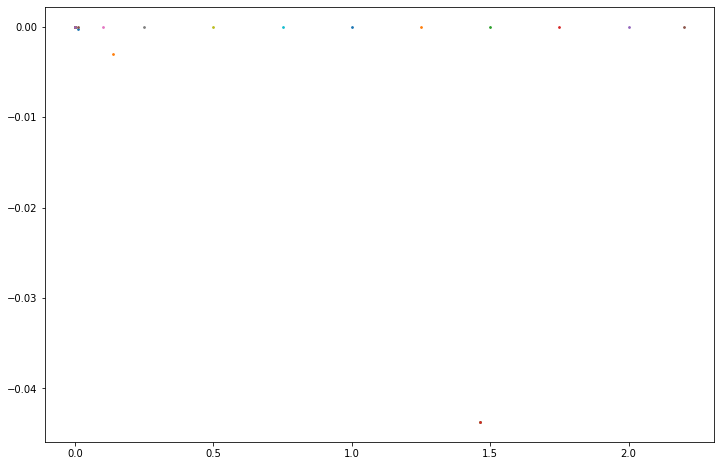

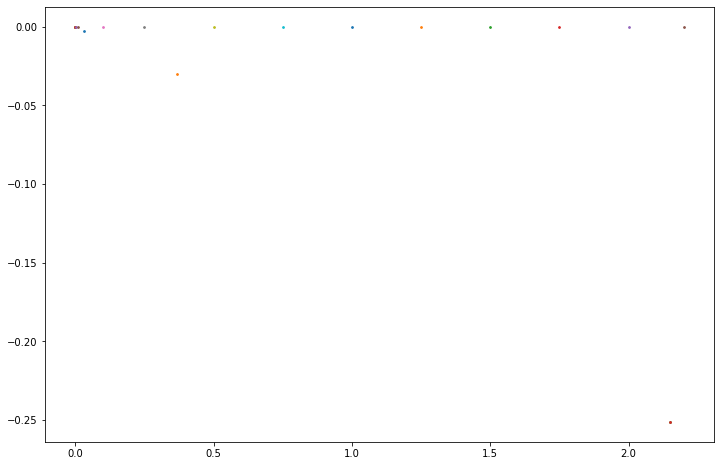

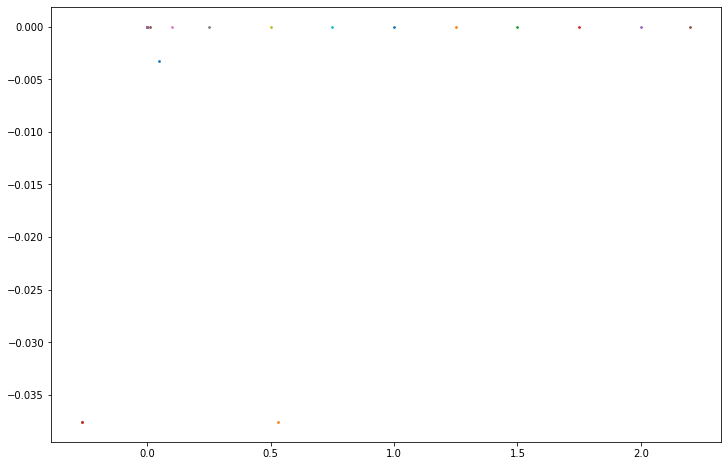

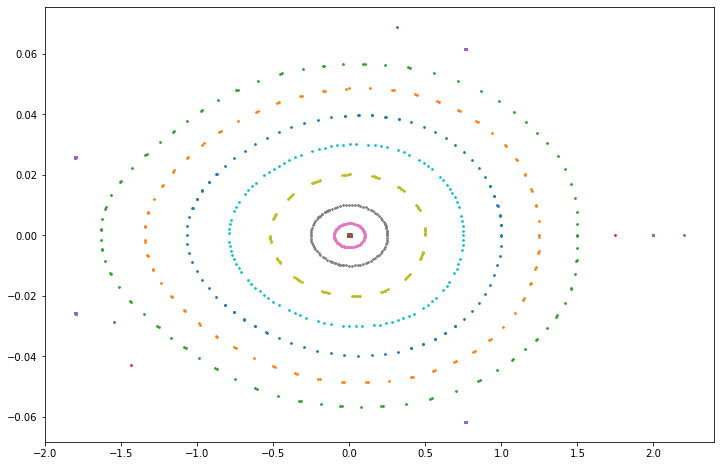

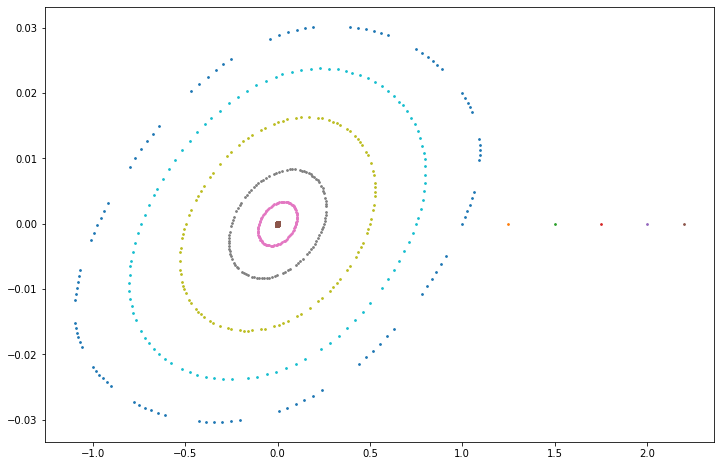

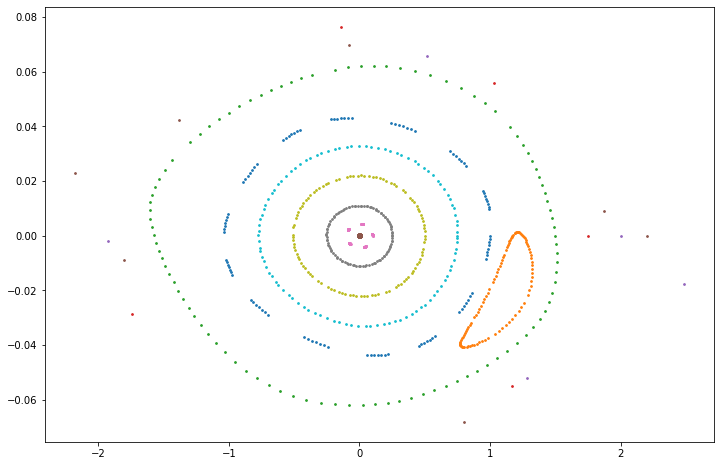

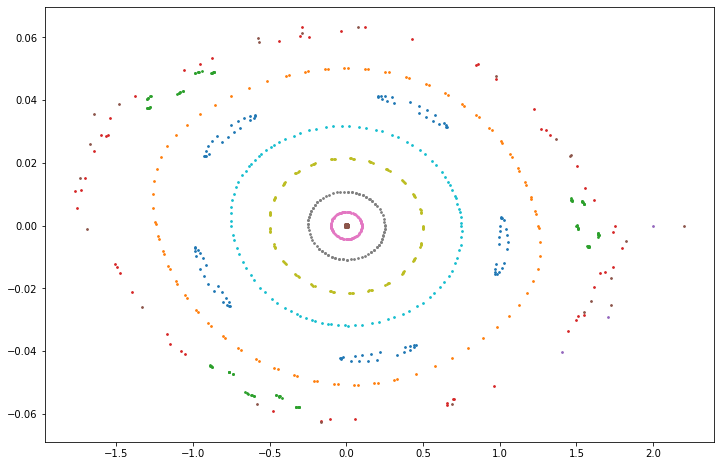

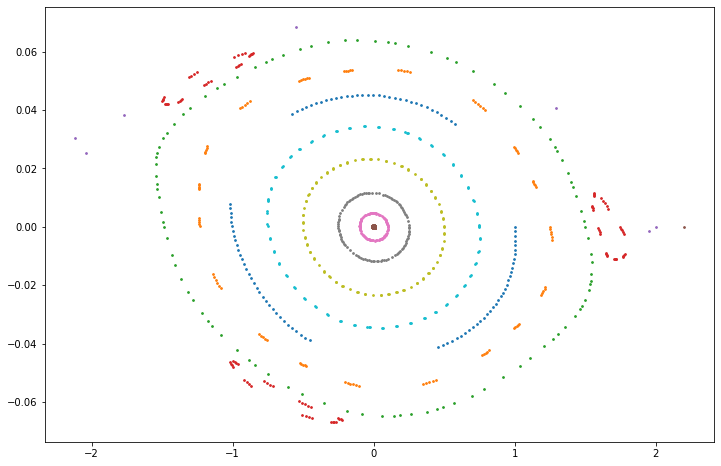

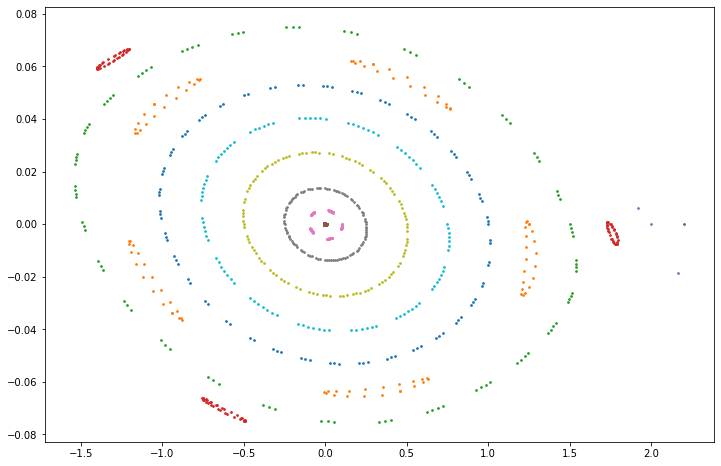

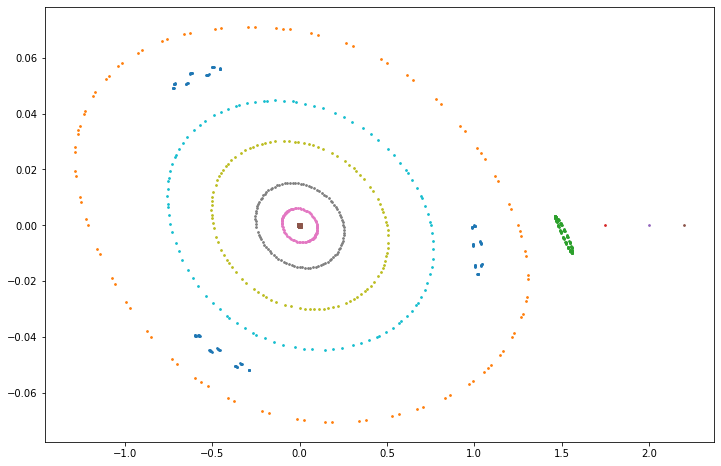

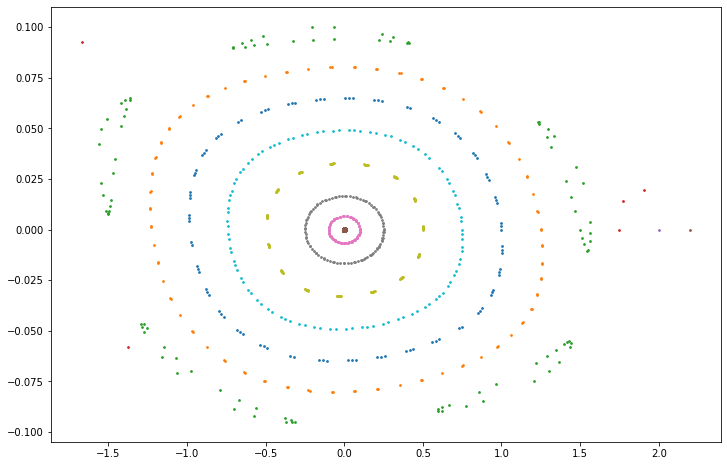

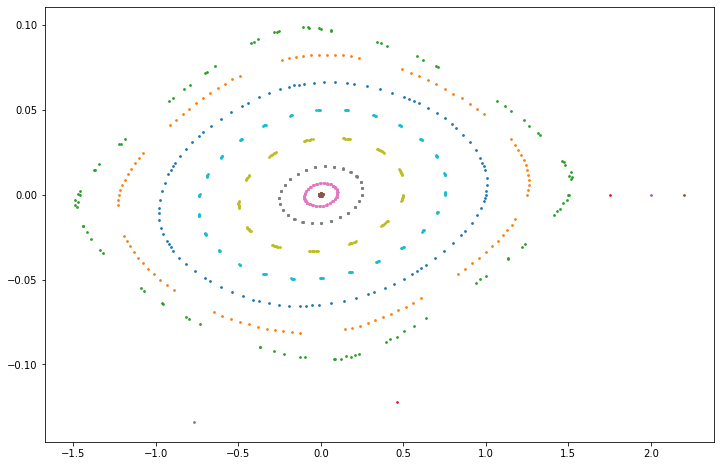

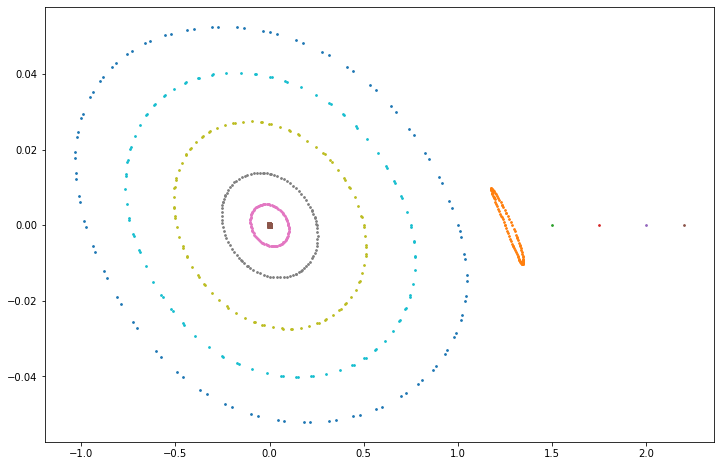

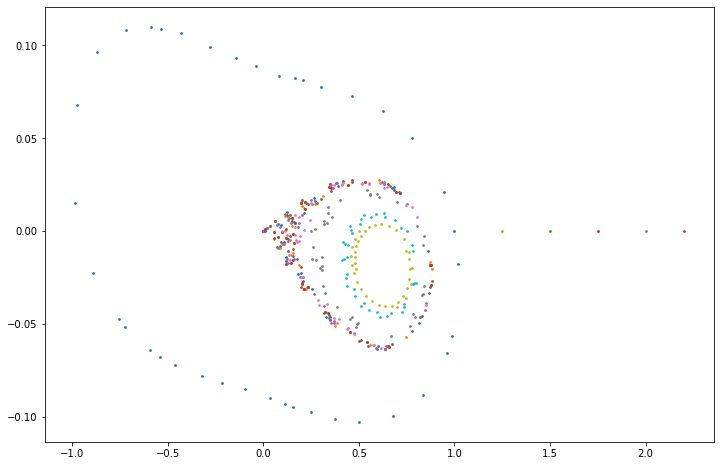

In [85]:
for _, g in dd_data.groupby("step"):
    fig = plt.figure(figsize=(12,8))
    for _,gg in g.groupby("particleID"):
        plt.scatter(gg["x"],gg["xp"],s=3)

In [90]:
testfile = "/home/mti/tmp/sdds/test-001.w1"
bintest = SDDS(sif, testfile, 0)
bintest.sddsplot()

In [196]:
testfile = "/home/mti/tmp/sdds/test.twi"
bintest = SDDS(sif, testfile, 0)
bintest.getColumnValues();
bintest.getColumnList()

['s',
 'betax',
 'alphax',
 'psix',
 'etax',
 'etaxp',
 'xAperture',
 'betay',
 'alphay',
 'psiy',
 'etay',
 'etayp',
 'yAperture',
 'pCentral0',
 'ElementName',
 'ElementOccurence',
 'ElementType',
 'dI1',
 'dI2',
 'dI3',
 'dI4',
 'dI5']

In [197]:
twidata = bintest.getColumnValues()

In [206]:
twidata.iloc[-1]['s']


239.99999999999858

In [193]:
pdf = bintest.getParameterValues()

/home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsprintout -parameters=* -spreadsheet /home/mti/tmp/sdds/test.twi


In [195]:
pdf.I2

1.442925

In [190]:
pd.to_numeric(pdf.drop(["SVNVersion","Stage"])['ParameterValue'])

ParameterName
Step         0.000000
nux         17.841400
dnux/dp    -52.732550
dnux/dp2     0.000000
dnux/dp3     0.000000
              ...    
Jy           1.000000
Sdelta0      0.000698
taudelta     0.008034
Jdelta       1.996775
U0           0.169676
Name: ParameterValue, Length: 75, dtype: float64

In [188]:
pd.to_numeric(pdf.drop(["SVNVersion"])["ParameterValue"])

ValueError: Unable to parse string "tunes" at position 18

In [182]:
pdf.drop(["SVNVersion"]).head(20)

,ParameterValue
ParameterName,
Step,0
nux,1.784140e+01
dnux/dp,-5.273255e+01
dnux/dp2,0.000000e+00
dnux/dp3,0.000000e+00
Ax,0.000000e+00
AxLocation,-1.797693e+308
nuy,6.746164e+00
dnuy/dp,-2.447711e+01
